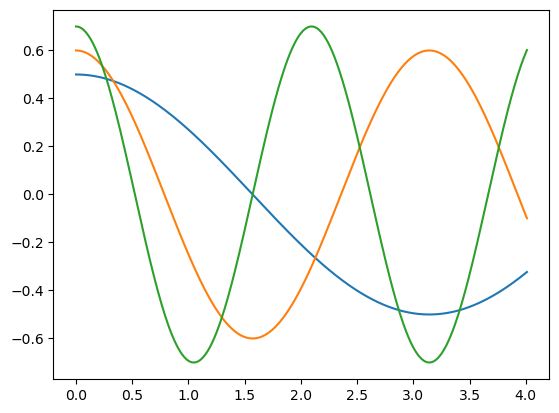

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


# 4th-order explicit Runge-Kutta
def rk4( x, y, dx, f ):
    dy1 = dx * f( x           , y             )
    dy2 = dx * f( x + 0.5 * dx, y + 0.5 * dy1 )
    dy3 = dx * f( x + 0.5 * dx, y + 0.5 * dy2 )
    dy4 = dx * f( x +       dx, y +       dy3 )
    return x + dx, y + ( dy1 + 2.0 * dy2 + 2.0 * dy3 + dy4 ) / 6.0


# Equation parameters
N = 3                                            # number of systems
k = np.array ( [ 1.0, 4.0, 9.0 ] )               # stiffnesses
m = np.array ( [ 1.0, 1.0, 1.0 ] )               # masses
x0 = np.array( [ 0.5, 0.6, 0.7 ] )               # initial displacements
v0 = np.array( [ 0.0, 0.0, 0.0 ] )               # initial velocities


# Derivative function (outputs a numpy array)
def deriv( t, y ):
    f = np.zeros_like( y )
    f[0:2*N-1:2] = y[1:2*N: 2]                   # derivative of positions
    f[1:2*N  :2] = -k * y[0:2*N-1:2] / m         # "true" harmonic oscillator; use np.sin() otherwise
    return f


# Initialise
t = 0
y = np.array( [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ] )
y[0:2*N-1:2] = x0                                # set positions in elements 0, 2, 4, ...
y[1:2*N  :2] = v0                                # set velocities in elements 1, 3, 5, ...
nt = 400
dt = 0.01

# Initialise for plotting
tvals=[]
xvals=[[] for i in range(N)]                     # careful!!!


# Successive timesteps
tvals.append( t )
for i in range( N ): xvals[i].append( y[2*i] )
for i in range( nt + 1 ):
    t, y = rk4( t, y, dt, deriv )               # Runge-Kutta update
    tvals.append( t )
    for i in range( N ): xvals[i].append( y[2*i] )


# Plot
for i in range( N ): plt.plot( tvals, xvals[i] )
plt.show()

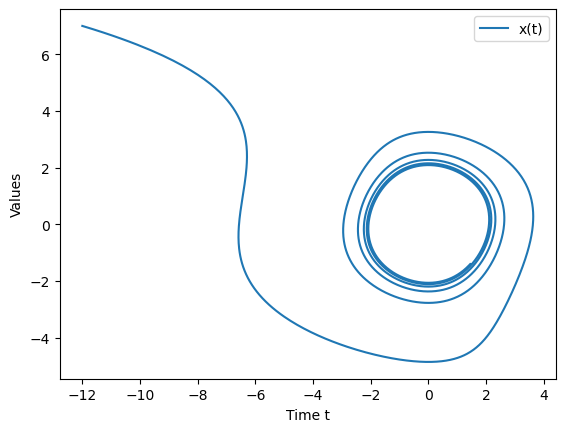

In [29]:
import numpy as np

def rk4_system(f, g, x0, y0, t0, tf, dt):
    """
    Solves a system of two differential equations using the RK4 method.

    Parameters:
    f  : function, the first differential equation dx/dt = f(x, y, t)
    g  : function, the second differential equation dy/dt = g(x, y, t)
    x0 : float, initial condition for x
    y0 : float, initial condition for y
    t0 : float, initial time
    tf : float, final time
    dt : float, time step

    Returns:
    t  : numpy array, time points
    x  : numpy array, solution for x at each time point
    y  : numpy array, solution for y at each time point
    """
    # Number of steps
    n = int((tf - t0) / dt) + 1

    # Initialize arrays
    t = np.linspace(t0, tf, n)
    x = np.zeros(n)
    y = np.zeros(n)

    # Set initial conditions
    x[0] = x0
    y[0] = y0

    # RK4 method
    for i in range(1, n):
        k1x = dt * f(x[i-1], y[i-1], t[i-1])
        k1y = dt * g(x[i-1], y[i-1], t[i-1])

        k2x = dt * f(x[i-1] + 0.5 * k1x, y[i-1] + 0.5 * k1y, t[i-1] + 0.5 * dt)
        k2y = dt * g(x[i-1] + 0.5 * k1x, y[i-1] + 0.5 * k1y, t[i-1] + 0.5 * dt)

        k3x = dt * f(x[i-1] + 0.5 * k2x, y[i-1] + 0.5 * k2y, t[i-1] + 0.5 * dt)
        k3y = dt * g(x[i-1] + 0.5 * k2x, y[i-1] + 0.5 * k2y, t[i-1] + 0.5 * dt)

        k4x = dt * f(x[i-1] + k3x, y[i-1] + k3y, t[i-1] + dt)
        k4y = dt * g(x[i-1] + k3x, y[i-1] + k3y, t[i-1] + dt)

        x[i] = x[i-1] + (k1x + 2*k2x + 2*k3x + k4x) / 6
        y[i] = y[i-1] + (k1y + 2*k2y + 2*k3y + k4y) / 6

    return t, x, y

# Example usage
def f(x, y, t):
    return 0.08*(1 - y**2) * x - y

def g(x, y, t):
    return x

x0 = -12
y0 = 7
t0 = 0.0
tf = 35.0
dt = 0.01

t, x, y = rk4_system(f, g, x0, y0, t0, tf, dt)

# Plotting the results (optional)
import matplotlib.pyplot as plt

plt.plot(x,y, label='x(t)')

plt.xlabel('Time t')
plt.ylabel('Values')
plt.legend()
plt.show()

In [30]:
points = list([float(a), float(b)] for (a,b) in zip(x,y))[::20]

print("\n".join(f"({a}, {b})" for (a,b) in points))

(-12.0, 7.0)
(-7.767707632117724, 5.1136037435947825)
(-6.55029161639424, 3.7063587117266086)
(-6.291033918196791, 2.431866228538724)
(-6.411138793864125, 1.1650517227439243)
(-6.576468000195089, -0.1356950131526572)
(-6.44221813555265, -1.4455579004483055)
(-5.698360207820413, -2.6712777707594126)
(-4.3170951341152985, -3.681408536248483)
(-2.6524880454540365, -4.37905302197615)
(-1.1398165469806572, -4.75315228434578)
(0.01328155024075596, -4.859475753823552)
(0.821915312513845, -4.770966774085827)
(1.3846383135974278, -4.547077407312887)
(1.7961623140784613, -4.227124320660122)
(2.123678809225348, -3.8341569115250524)
(2.4094036113245103, -3.3803996968979177)
(2.6775274852229343, -2.8715397422619997)
(2.9386885084803342, -2.3098255535481886)
(3.190838170593432, -1.69663243845697)
(3.4170363882183348, -1.0351789558166329)
(3.582009820736538, -0.33385542452399053)
(3.6319003441010573, 0.38997593972207234)
(3.5045429976954092, 1.1070520961664807)
(3.155148685264799, 1.7768762090366046)